In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font, fontScale=5,color=(255,255,255),thickness=30)
    return blank_img

In [10]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

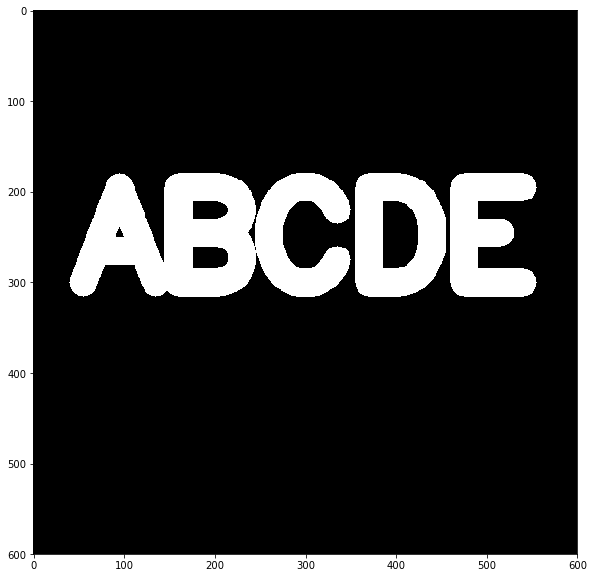

In [26]:
img = load_img()
display_img(img)

In [12]:
kernel = np.ones((5,5), dtype=np.uint8)

In [13]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

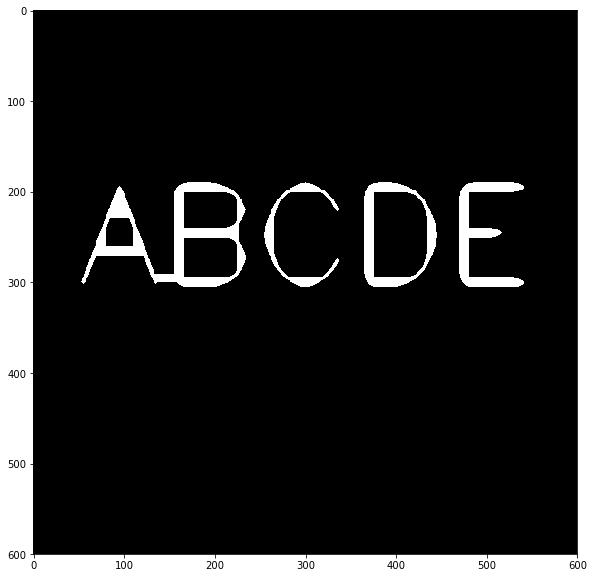

In [15]:
result = cv2.erode(img,kernel,iterations=5)
display_img(result)

In [28]:
img = load_img()

In [17]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))
white_noise

array([[0, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 1]])

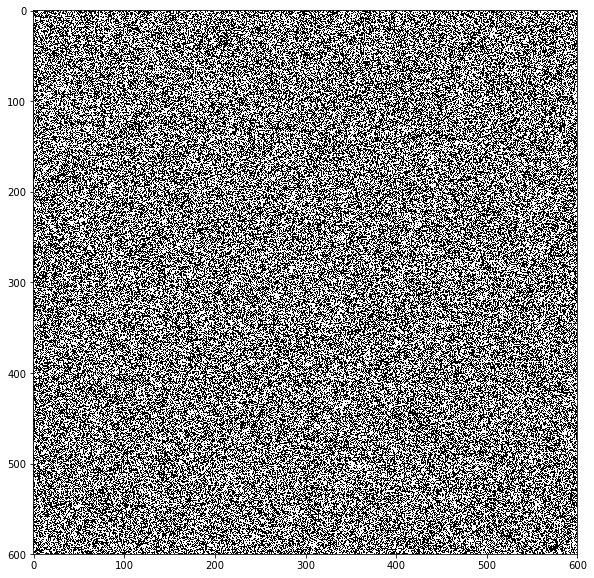

In [18]:
display_img(white_noise)

In [31]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font, fontScale=5,color=(255,255,255),thickness=30)
    return blank_img

In [37]:
white_noise = white_noise*255
white_noise

array([[        0,         0, -66716671, ..., -66716671,         0,
        -66716671],
       [-66716671,         0,         0, ...,         0, -66716671,
                0],
       [        0, -66716671,         0, ...,         0, -66716671,
        -66716671],
       ...,
       [-66716671,         0,         0, ..., -66716671, -66716671,
        -66716671],
       [-66716671,         0,         0, ...,         0, -66716671,
                0],
       [-66716671, -66716671, -66716671, ...,         0, -66716671,
        -66716671]])

In [34]:
img = load_img()

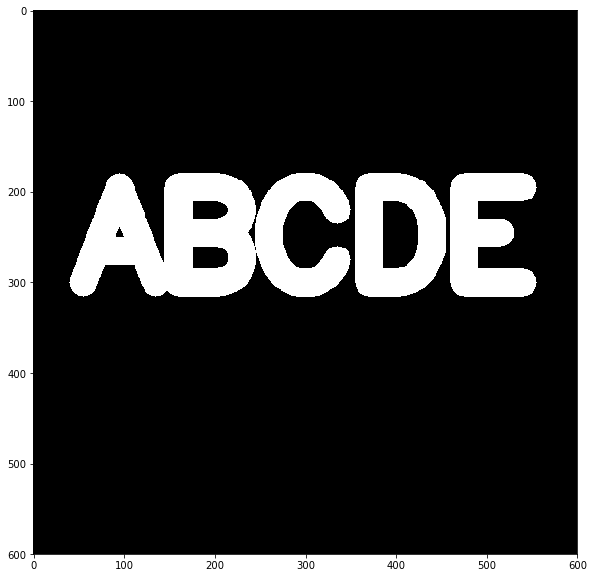

In [35]:
display_img(img)

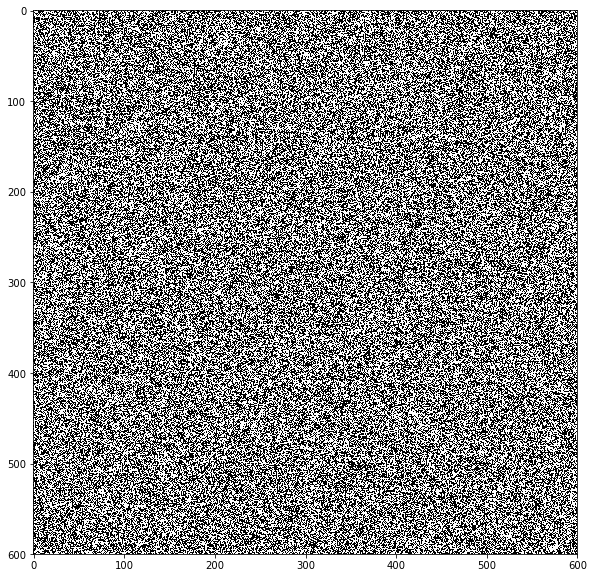

In [38]:
noise_img = white_noise + img
display_img(noise_img)


In [42]:
# uses erosion followed by dilation
#removes background noise
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

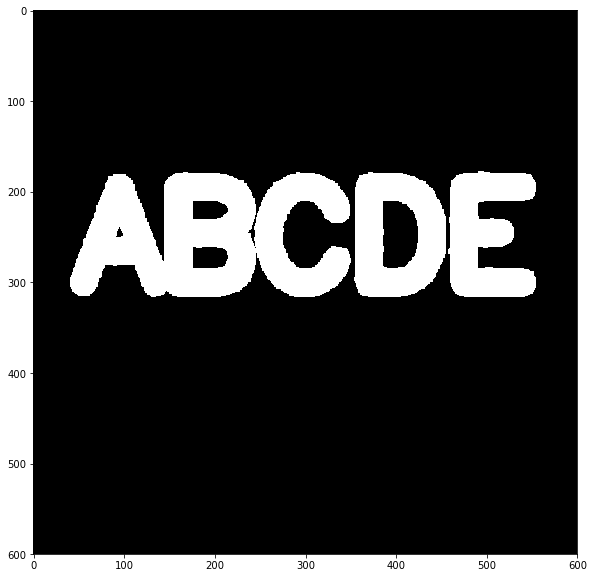

In [43]:
display_img(opening)

In [53]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [54]:
black_noise = black_noise*-255

In [55]:
black_noise

array([[   0,    0, -255, ..., -255, -255, -255],
       [-255, -255,    0, ...,    0, -255,    0],
       [-255,    0, -255, ..., -255, -255,    0],
       ...,
       [   0, -255,    0, ..., -255,    0,    0],
       [   0,    0,    0, ..., -255,    0, -255],
       [   0,    0, -255, ...,    0,    0,    0]])

In [56]:
black_noise_img = black_noise + img

In [57]:
black_noise_img

array([[   0.,    0., -255., ..., -255., -255., -255.],
       [-255., -255.,    0., ...,    0., -255.,    0.],
       [-255.,    0., -255., ..., -255., -255.,    0.],
       ...,
       [   0., -255.,    0., ..., -255.,    0.,    0.],
       [   0.,    0.,    0., ..., -255.,    0., -255.],
       [   0.,    0., -255., ...,    0.,    0.,    0.]])

In [59]:
black_noise_img[black_noise_img==-255] = 0

In [60]:
black_noise_img.min()

0.0

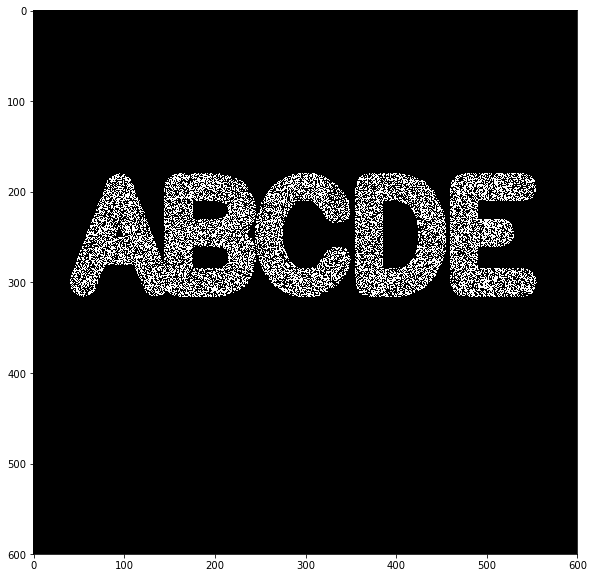

In [61]:
display_img(black_noise_img)

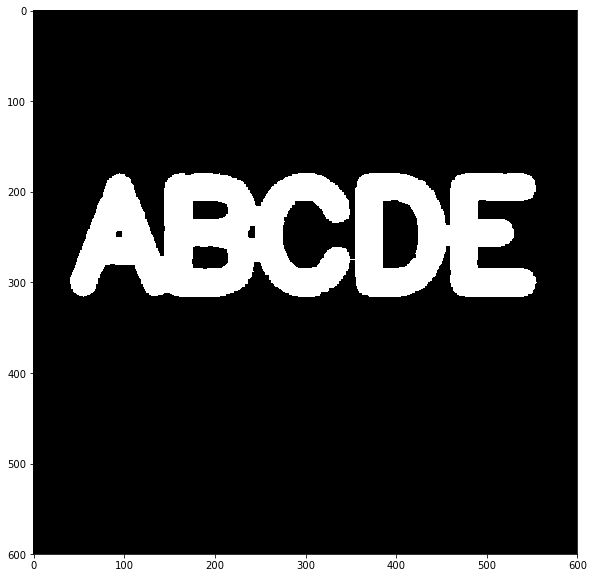

In [63]:
# getting rid of the foreground noise
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

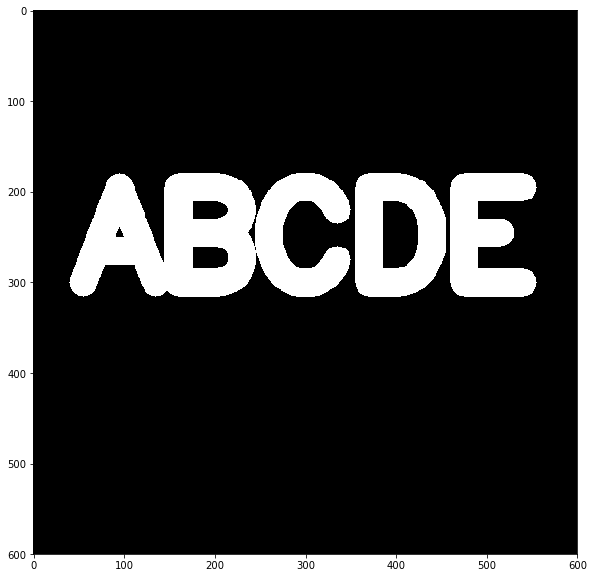

In [65]:
img = load_img()
display_img(img)

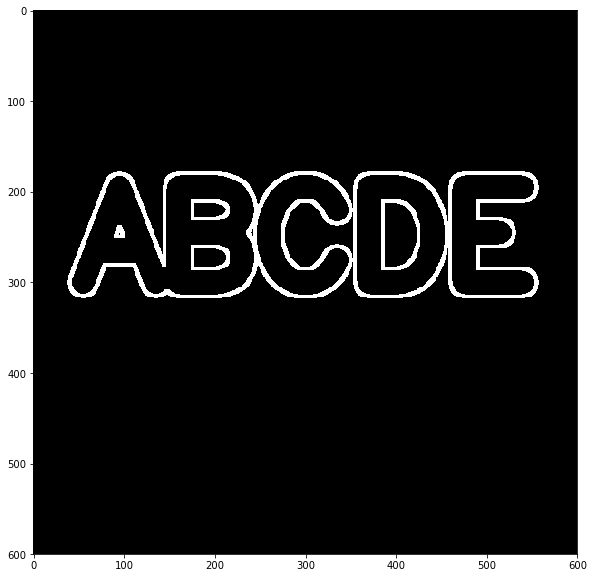

In [66]:
# Method of edge detection (essentially difference between dilation and erosion)
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)